# Eda_on_customers_dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


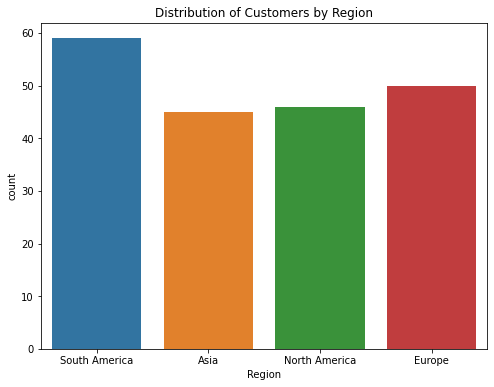

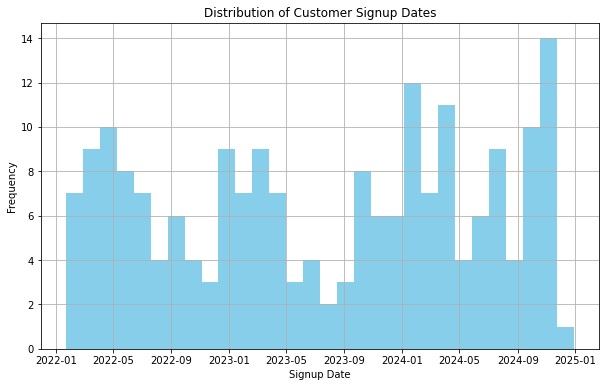

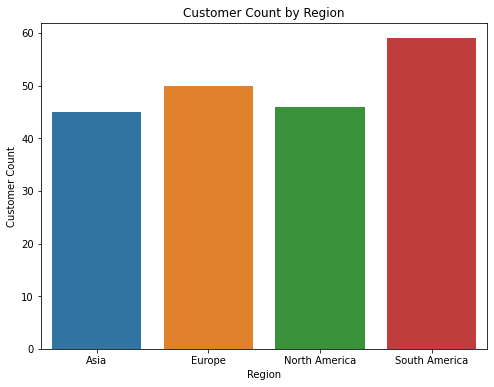

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Customers.csv")


print(df.info())  
print(df.describe())  


print(df.isnull().sum())

df['SignupDate'] = pd.to_datetime(df['SignupDate'], format='%Y-%m-%d')



print(df['Region'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Region')
plt.title("Distribution of Customers by Region")
plt.show()

plt.figure(figsize=(10, 6))
df['SignupDate'].hist(bins=30, color='skyblue')
plt.title("Distribution of Customer Signup Dates")
plt.xlabel('Signup Date')
plt.ylabel('Frequency')
plt.show()


region_signup = df.groupby('Region').size().reset_index(name='Customer Count')


plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Customer Count', data=region_signup)
plt.title("Customer Count by Region")
plt.show()


# Eda_on_products_dataset

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
0


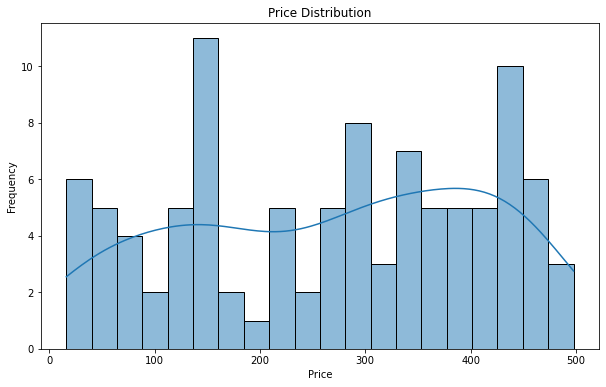

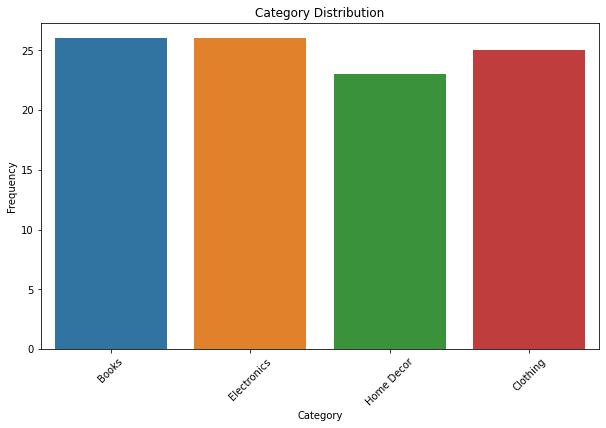

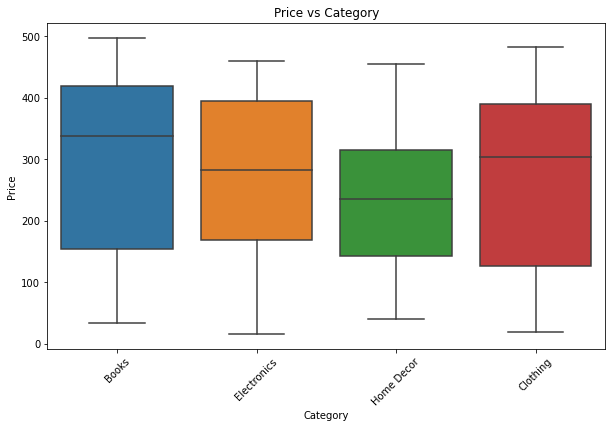

C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


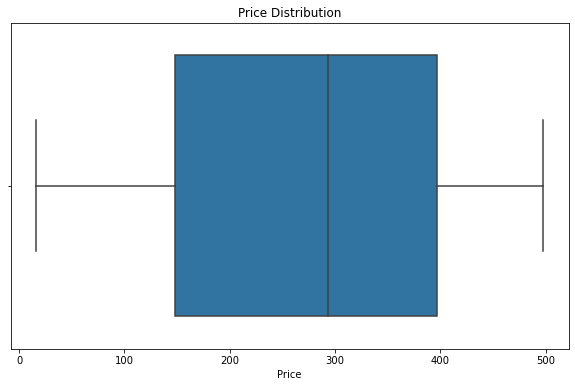

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv("Products.csv")

print(df.isnull().sum())


print(df.duplicated().sum())

plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True, bins=20)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Price')
plt.title('Price vs Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(df['Price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()


print(df.describe())


# Eda_on_Transactions_dataset

Missing values per column:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate rows:
0

Data types of each column:
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

Descriptive statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


C:\Users\John\AppData\Local\Temp\ipykernel_8500\908691910.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


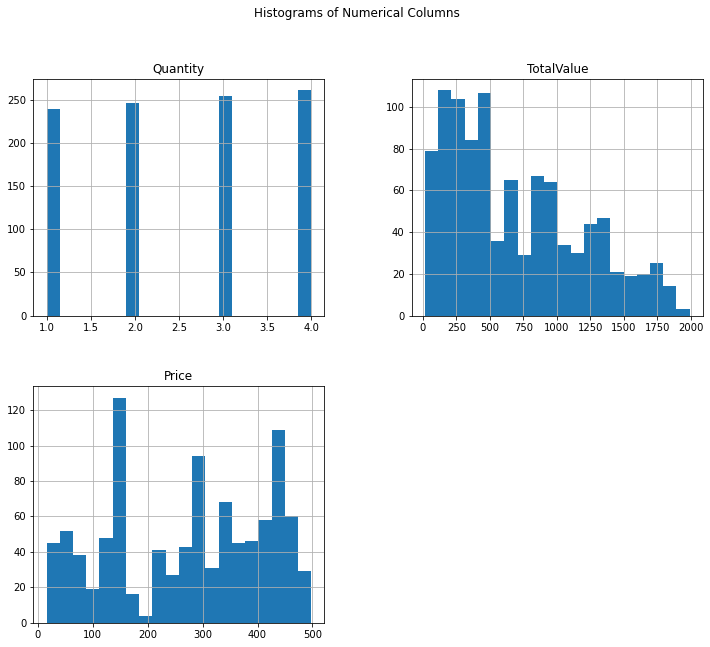

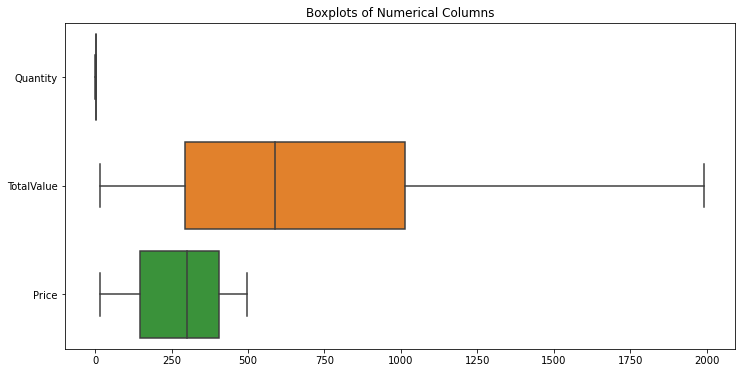

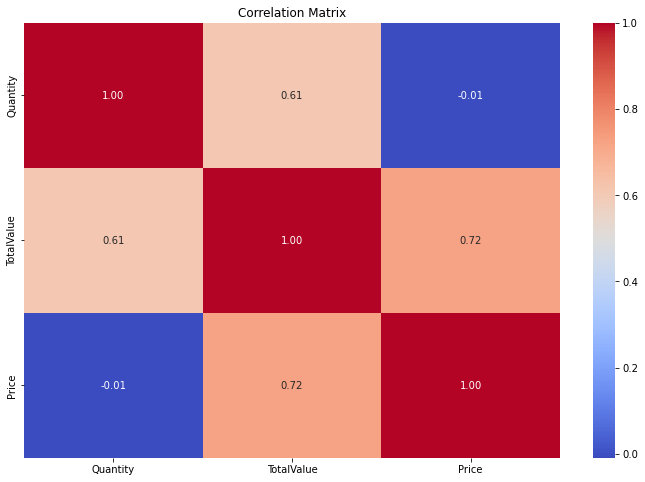


Outliers in each column:
CustomerID         0
Price              0
ProductID          0
Quantity           0
TotalValue         0
TransactionDate    0
TransactionID      0
dtype: int64


C:\Users\John\AppData\Local\Temp\ipykernel_8500\908691910.py:53: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
    

df = pd.read_csv('Transactions.csv')


print("Missing values per column:")
print(df.isnull().sum())

df.fillna(df.median(), inplace=True)


print("\nDuplicate rows:")
print(df.duplicated().sum())


df.drop_duplicates(inplace=True)


print("\nData types of each column:")
print(df.dtypes)


print("\nDescriptive statistics:")
print(df.describe())


df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Columns')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplots of Numerical Columns')
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()
print("\nOutliers in each column:")
print(outliers_count)

